In [1]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def rastrigin2d(rvec):
    const = 20. # for 2 dimensions
    tosum = rvec**2. - 10*np.cos(2*np.pi*rvec)
    return const * tosum.sum()
# end def

In [4]:
nx = 100
x = np.linspace(-5.12,5.12,nx)
grid = np.apply_along_axis(rastrigin2d,1
    ,[np.array([myx,myy]) for myx in x for myy in x] )
grid = grid.reshape(nx,nx)

In [42]:
landscape = rastrigin2d

pop_size = 20
dim = 2
max_hop = 0.1
c1 = 1
c2 = 1

minx = -5.12
maxx = 5.15

# initialize population
pop = (maxx-minx) * np.random.rand(pop_size,dim) + minx

# find personal best
individual_best = np.apply_along_axis(rastrigin2d,1,pop)
individual_best_pos = deepcopy(pop)

# find population best
min_idx = np.argmin(individual_best)
global_best = individual_best[min_idx].copy()
global_best_pos = pop[min_idx].copy()

# initialize hopping sizes and directions
hop = max_hop * np.random.rand(pop_size,dim)

In [59]:
max_it = 5
for istep in range(max_it):
    
    # evaluate fitness of population
    fitness = np.apply_along_axis(landscape,1,pop)
    
    # calculate global best
    min_idx = np.argmin(fitness)
    current_best = fitness[min_idx]
    if current_best < global_best:
        global_best = current_best
        global_best_pos = pop[min_idx].copy()
    # end if
    
    # update individual best
    idx = np.where( np.array(fitness) < np.array(individual_best) )
    individual_best[idx] = fitness[idx]
    individual_best_pos[idx] = deepcopy( pop[idx] )
    
    # update hopping
    hop += c1*np.random.rand()*(individual_best_pos-pop) + \
        c2*np.random.rand()*(global_best_pos-pop)
    idx = np.where( abs(hop) > max_hop )
    hop[idx] = np.sign(hop[idx])*max_hop
    
    # update populaton
    pop += hop
    
    out_idx = np.where(pop>maxx)
    pop[out_idx] = maxx
    out_idx = np.where(pop<minx)
    pop[out_idx] = minx
    
# end for istep
print global_best
print global_best_pos

-357.45595883
[-0.99595866 -0.96861267]


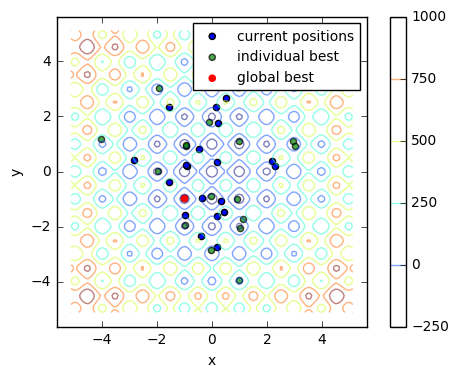

In [60]:
background = plt.figure()
ax = background.add_subplot(111,aspect=1)
ax.set_xlabel("x")
ax.set_ylabel("y")

cs = ax.contour(x,x,grid.T,alpha=0.5)
ax.scatter(pop.T[0],pop.T[1],label="current positions")

ax.scatter(individual_best_pos.T[0],individual_best_pos.T[1]
        ,c="g",alpha=0.7,label="individual best")
ax.scatter(global_best_pos[0],global_best_pos[1],color="r"
        ,label="global best")

ax.legend(scatterpoints = 1,fontsize=10,loc="best")
background.colorbar(cs)

plt.savefig("pso-intermediate.eps")

1. how to determine convergence?
2. how to decide parameters for fast convergence?

In [2]:
def schaffer_f6(r):
    temp1 = np.sin( np.sqrt(np.dot(r,r)) )
    temp2 = 1 + 0.001 * np.dot(r,r)
    return 0.5 + (temp1 * temp1 - 0.5) / (temp2 * temp2)
# end def schaffer_f6